# Multilayer Perceptron

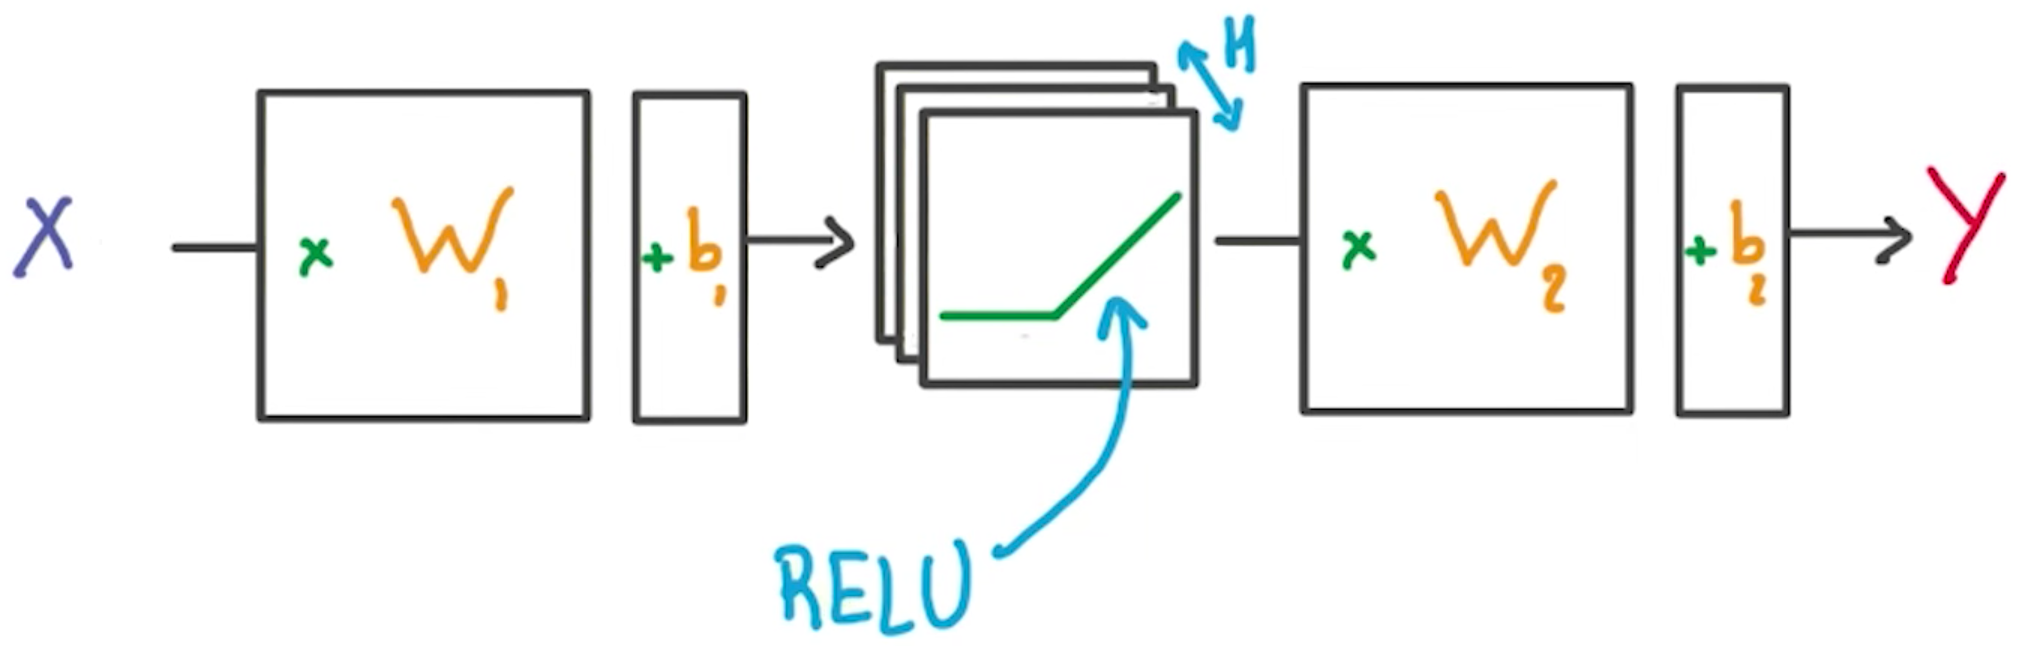

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            # The MNIST library in TensorFlow provides the ability to receive the dataset in batches. 
            # mnist.train.next_batch() function returns a subset of the training data
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display logs per epoch step
        if epoch % display_step == 0:
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(c))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    # Decrease test_size if you don't have enough memory
    test_size = 256
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:test_size], y: mnist.test.labels[:test_size]}))


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 49.683200836
Epoch: 0002 cost= 27.501438141
Epoch: 0003 cost= 21.691474915
Epoch: 0004 cost= 20.339981079
Epoch: 0005 cost= 16.182355881
Epoch: 0006 cost= 15.327438354
Epoch: 0007 cost= 11.146162033
Epoch: 0008 cost= 8.102626801
Epoch: 0009 cost= 9.374296188
Epoch: 0010 cost= 7.979860783
Epoch: 0011 cost= 8.190814018
Epoch: 0012 cost= 9.307254791
Epoch: 0013 cost= 7.315162659
Epoch: 0014 cost= 5.443889618
Epoch: 0015 cost= 9.922063828
Epoch: 0016 cost= 9.873104095
Epoch: 0017 cost= 8.054642677
Epoch: 0018 cost= 6.827816963
Epoch: 0019 cost= 7.531592369
Epoch: 0

# Deeper Neural Network

That's it! Going from one layer to two is easy. Adding more layers to the network allows you to solve more complicated problems. In the next video, you'll see how changing the number of layers can affect your network.

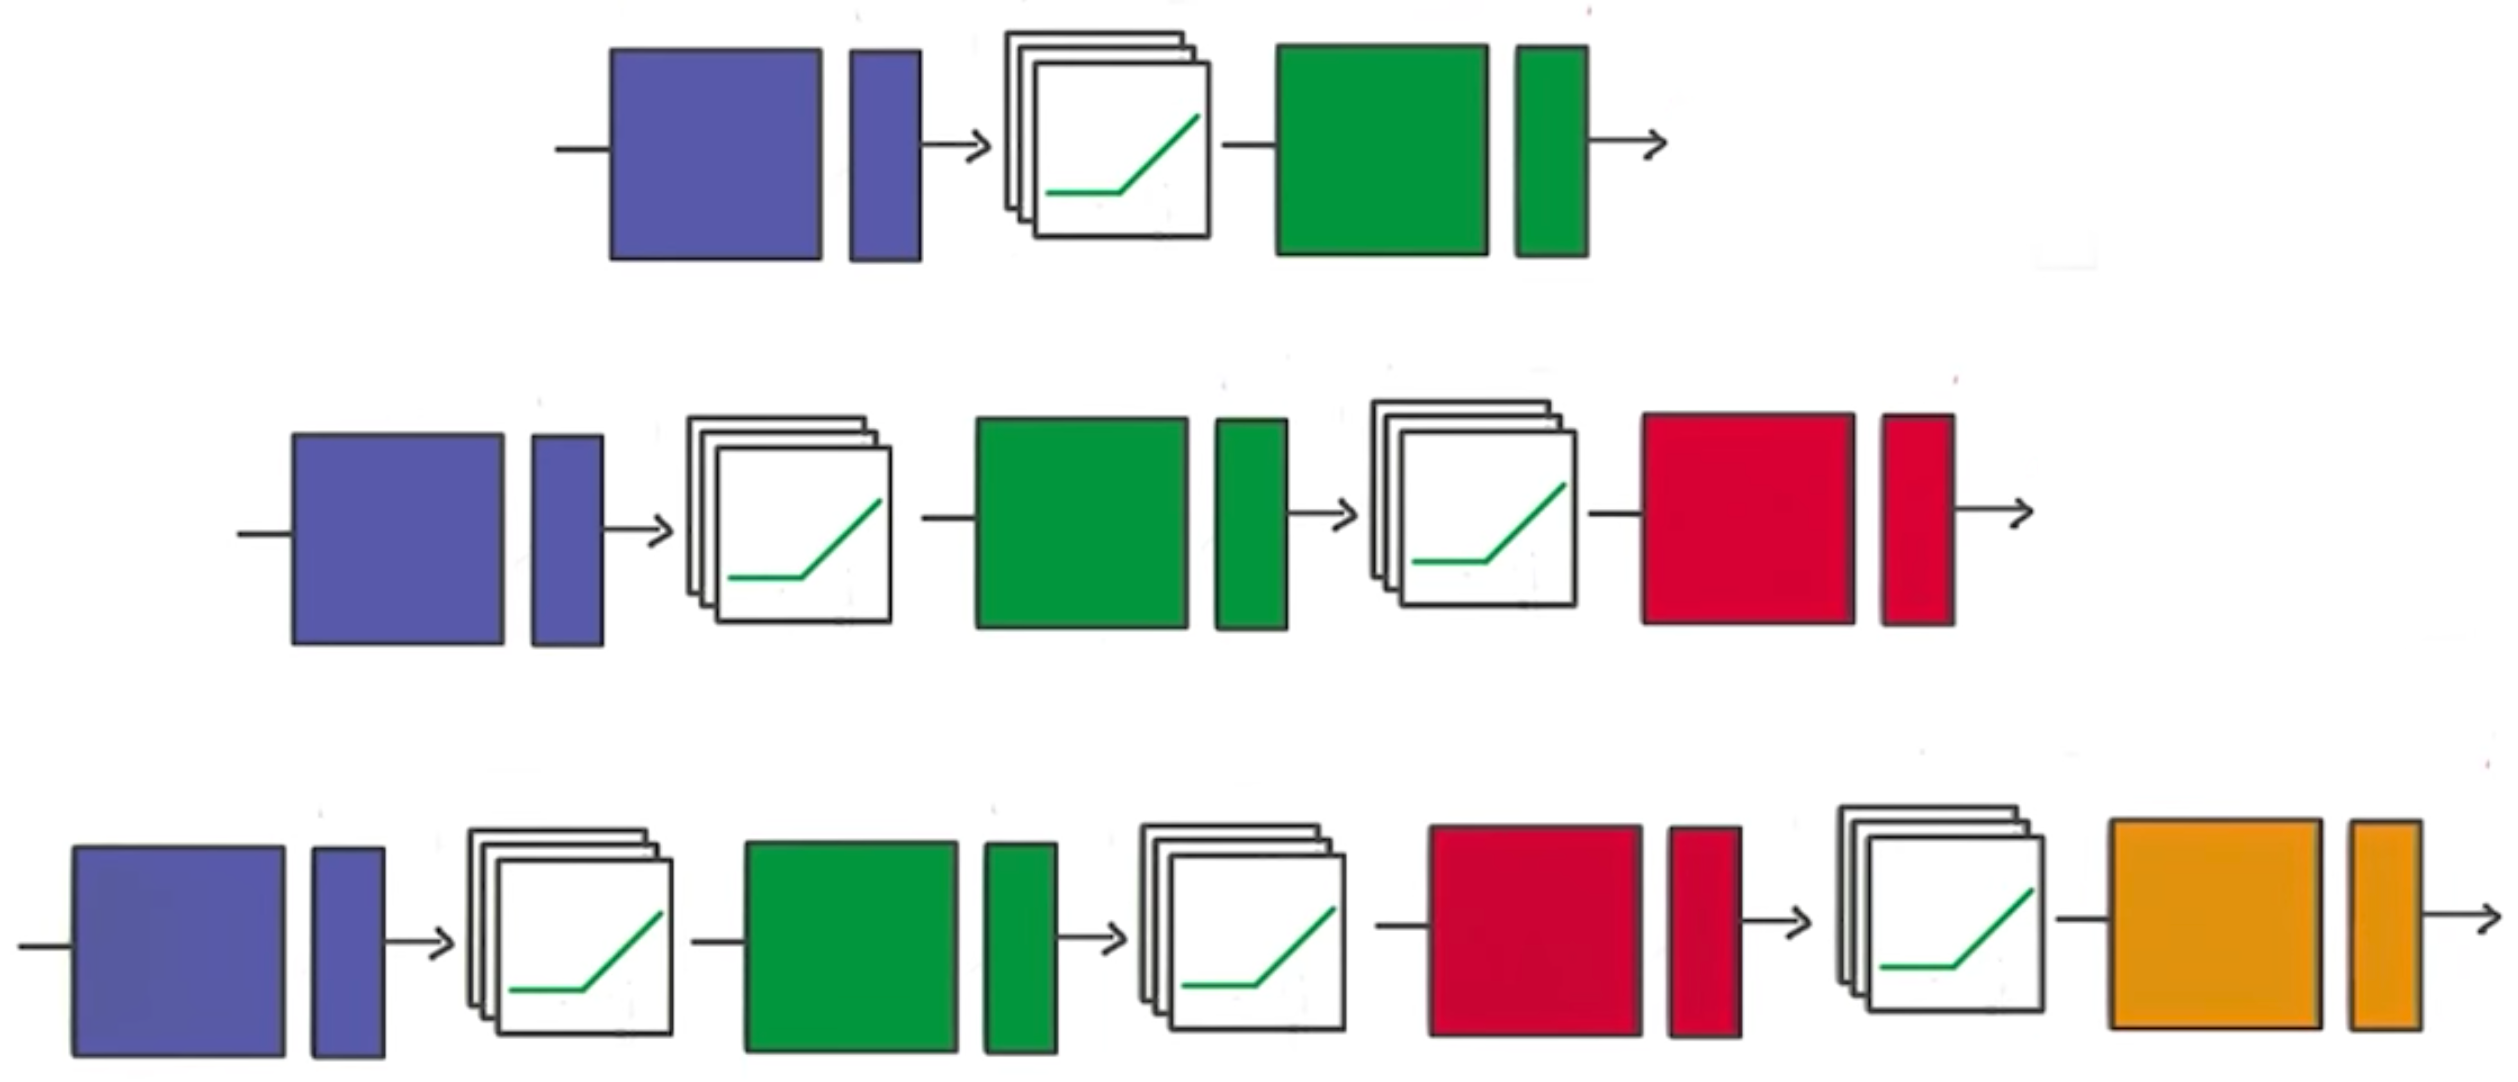